# MLP Classification

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer

raw_data = load_breast_cancer()
X, y = raw_data.data, raw_data.target

print(f"Any nans? {np.isnan(X).any()}")
X.shape, y.shape

Any nans? False


((569, 30), (569,))

### Train|test split

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### MLP Network

In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, InputLayer

def MLP():
    model = Sequential(name="MLP")
    model.add(InputLayer(X.shape[1], name="Input_layer"))
    model.add(Dense(32, name="Hidden1", activation="relu")) #Multiples of 2 is often used
    model.add(Dense(32, name="Hidden2", activation="relu"))
    model.add(Dense(1, name="Output", activation="sigmoid"))

    model.compile(loss="binary_crossentropy", optimizer="adam")
    return model

print(f"Training parameters {(30+1)*32+(33*32)+33}")
model = MLP()
model.summary()

#30 features and 32 nodes, (30+1)*32 (1 is the bias term) = 992
#32 nodes in first hidden layer and 32 in the second, 33*32 = 1056

Training parameters 2081
Model: "MLP"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden1 (Dense)             (None, 32)                992       
                                                                 
 Hidden2 (Dense)             (None, 32)                1056      
                                                                 
 Output (Dense)              (None, 1)                 33        
                                                                 
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(scaled_X_train, y_train, epochs=500, validation_split=.2, verbose=1) #Use validation_split so then it will automatically split the training data

Epoch 1/500
12/12 [==============================] - 1s 33ms/step - loss: 0.6364 - val_loss: 0.4875
Epoch 2/500
12/12 [==============================] - 0s 13ms/step - loss: 0.4020 - val_loss: 0.3324
Epoch 3/500
12/12 [==============================] - 0s 12ms/step - loss: 0.2794 - val_loss: 0.2483
Epoch 4/500
12/12 [==============================] - 0s 11ms/step - loss: 0.2080 - val_loss: 0.1987
Epoch 5/500
12/12 [==============================] - 0s 17ms/step - loss: 0.1633 - val_loss: 0.1691
Epoch 6/500
12/12 [==============================] - 0s 9ms/step - loss: 0.1340 - val_loss: 0.1506
Epoch 7/500
12/12 [==============================] - 0s 8ms/step - loss: 0.1137 - val_loss: 0.1386
Epoch 8/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0995 - val_loss: 0.1307
Epoch 9/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0881 - val_loss: 0.1257
Epoch 10/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0790 - val_loss: 0.1219
Epo

In [17]:
import pandas as pd
df_loss = pd.DataFrame(model.history.history) #Do not run this two times
df_loss.head()

,loss,val_loss
0,0.636419,0.487494
1,0.401961,0.332411
2,0.279374,0.248343
3,0.207954,0.198665
4,0.163328,0.169143


<AxesSubplot:>

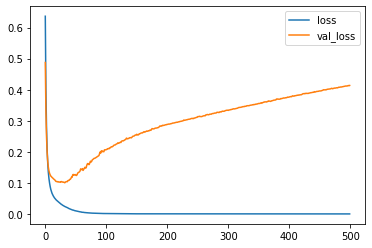

In [18]:
df_loss.plot()
#Clear overfitting, as validation loss increases after a certain amount of epochs

### Early stopping

In [19]:
model = MLP()
model.summary()

Model: "MLP"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden1 (Dense)             (None, 32)                992       
                                                                 
 Hidden2 (Dense)             (None, 32)                1056      
                                                                 
 Output (Dense)              (None, 1)                 33        
                                                                 
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(scaled_X_train, y_train, epochs=50, validation_split=.2, verbose=1) #Use validation_split so then it will automatically split the training data

Epoch 1/50
12/12 [==============================] - 1s 25ms/step - loss: 0.7200 - val_loss: 0.6192
Epoch 2/50
12/12 [==============================] - 0s 10ms/step - loss: 0.5462 - val_loss: 0.4769
Epoch 3/50
12/12 [==============================] - 0s 13ms/step - loss: 0.4076 - val_loss: 0.3593
Epoch 4/50
12/12 [==============================] - 0s 10ms/step - loss: 0.2954 - val_loss: 0.2709
Epoch 5/50
12/12 [==============================] - 0s 10ms/step - loss: 0.2166 - val_loss: 0.2130
Epoch 6/50
12/12 [==============================] - 0s 10ms/step - loss: 0.1651 - val_loss: 0.1807
Epoch 7/50
12/12 [==============================] - 0s 11ms/step - loss: 0.1355 - val_loss: 0.1622
Epoch 8/50
12/12 [==============================] - 0s 8ms/step - loss: 0.1152 - val_loss: 0.1516
Epoch 9/50
12/12 [==============================] - 0s 8ms/step - loss: 0.1009 - val_loss: 0.1425
Epoch 10/50
12/12 [==============================] - 0s 7ms/step - loss: 0.0893 - val_loss: 0.1364
Epoch 11/50


<AxesSubplot:>

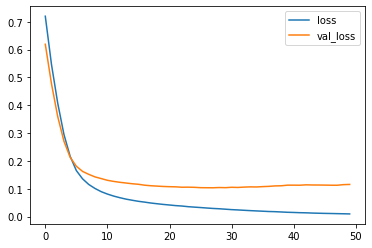

In [21]:
pd.DataFrame(model.history.history).plot() #Do not run this two times

In [22]:
model = MLP()
model.fit(scaled_X_train, y_train, epochs=50, verbose=0) #Use validation_split so then it will automatically split the training data

### Prediction and Evaluation

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.99      0.97      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



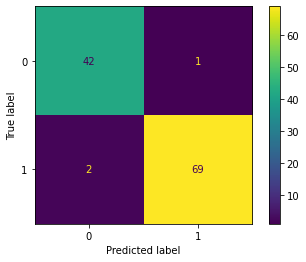

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(scaled_X_test)
y_pred = (y_pred > .5)*1

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
print(classification_report(y_test, y_pred))